In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#Разделяем на тренировочные и тестовые данные

data_train, data_test, y_train, y_test = train_test_split(data.drop(columns='HeartDisease'), data['HeartDisease'], test_size=0.20, random_state=42)

In [8]:
#Находим категориальные признаки

categorials = list(data.dtypes[data.dtypes == object].index)

categorials

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [9]:
# Количество уникальных значений в каждом категориальном признаке

categorials_nunique = data_train[categorials].nunique()

categorials_nunique

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [28]:
#отфильтруем непрерывные признаки
integer = [f for f in data if f not in (categorials + ['HeartDisease'])]

In [29]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(data_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(data_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

X_train = pd.concat([data_train[integer], dummy_train], axis=1)

X_test = pd.concat([data_test[integer], dummy_test], axis=1)

In [30]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope_Up,ChestPainType_NAP,Sex_M,Sex_F,ST_Slope_Down,ST_Slope_Flat,RestingECG_LVH,ChestPainType_ATA,RestingECG_Normal,ExerciseAngina_N,ChestPainType_ASY,RestingECG_ST,ExerciseAngina_Y,ChestPainType_TA
795,42,120,240,1,194,0.8,0,1,1,0,1,0,0,0,1,1,0,0,0,0
25,36,130,209,0,178,0.0,1,1,1,0,0,0,0,0,1,1,0,0,0,0
84,56,150,213,1,125,1.0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
10,37,130,211,0,142,0.0,1,1,0,1,0,0,0,0,1,1,0,0,0,0
344,51,120,0,1,104,0.0,0,0,1,0,0,1,0,0,1,1,1,0,0,0


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Обучаем дерево решений

dtс = DecisionTreeClassifier()
dtс.fit(X_train, y_train)

dtс.score(X_test, y_test)

0.7934782608695652

In [39]:
# Обучаем случайный лес
rfс = RandomForestClassifier()
rfс.fit(X_train, y_train)

rfс.score(X_test, y_test)

0.8804347826086957

##  Бегинг

In [41]:
from sklearn.ensemble import  BaggingClassifier

In [46]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)

In [47]:
bagging.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [48]:
bagging.score(X_train, y_train)

0.9904632152588556

In [49]:
bagging.score(X_test, y_test)

0.8478260869565217

## Стекинг

In [53]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [54]:
# Создаем стэккинг и обучаем его на наших данных 

sc = StackingClassifier(
    [
        ('DecisionTreeClassifier', DecisionTreeClassifier()),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('LinearSVC', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))
    ], LinearSVC())

In [55]:
sc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('LinearSVC',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LinearSVC())

In [56]:
print(f'Score on train data {sc.score(X_train, y_train)}')
print(f'Score on test data {sc.score(X_test, y_test)}')

for i in sc.named_estimators:
    print(f'Score on train data with model {i} {sc.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test data with model {i} {sc.named_estimators_[i].score(X_test, y_test)}')


Score on train data 0.9564032697547684
Score on test data 0.8804347826086957
Score on train data with model DecisionTreeClassifier 1.0
Score on test data with model DecisionTreeClassifier 0.7934782608695652
Score on train data with model RandomForestClassifier 1.0
Score on test data with model RandomForestClassifier 0.875
Score on train data with model LinearSVC 0.8719346049046321
Score on test data with model LinearSVC 0.8532608695652174


Лучше всех справился Случайный лес.
Дерево решений переобучилось. Линейный классификатор справился с задачей на уровне Случайного леса. 

In [57]:
score_train = {}
score_test = {}

for i in sc.named_estimators:
    score_train[i] = sc.named_estimators_[i].score(X_train, y_train)
    score_test[i] = sc.named_estimators_[i].score(X_test, y_test)

score_train['Total']= sc.score(X_train, y_train)
score_test['Total']= sc.score(X_test, y_test)

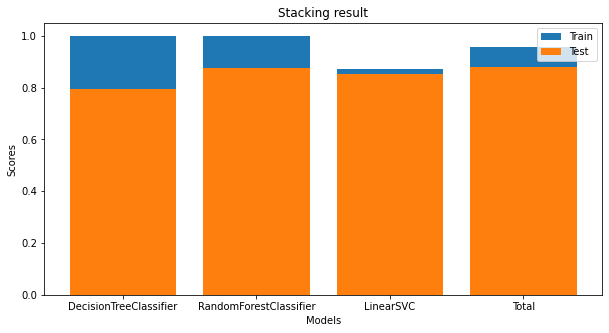

In [58]:
plt.figure(figsize=(10,5))
plt.bar(range(len(score_train)), score_train.values(), align="center", label='Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align="center", label='Test')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()